In [63]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.svm import SVC
from sklearn.svm import SVR

In [18]:
import matplotlib.pyplot as plt

In [ ]:
plt.show()

In [2]:
cwd = os.getcwd()
cwd

'C:\\Users\\Mohamed.Imran\\OneDrive - Shell\\Documents\\MI'

In [3]:
os.chdir(r'C:\Users\Mohamed.Imran\Desktop\Imran\Online_working\SVM')

In [48]:
data = pd.read_csv('winequality-white.csv', sep = ';')

In [8]:
y = data.pop('quality')

In [9]:
data[:3]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1


In [10]:
y[:3]

0    6
1    6
2    6
Name: quality, dtype: int64

In [12]:
x_train, x_test, y_train, y_test = train_test_split(data, y, test_size = 0.2, random_state = 100)

In [15]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [16]:
x_train[:3]

array([[-0.1810722 ,  1.10295601, -0.78415492, -0.73441374, -1.30945376,
        -0.78522829, -1.37188034, -1.06507273, -1.04923987, -1.05908796,
         0.80169347],
       [-0.53946619,  0.41109215, -0.61596995,  0.29778158,  0.19248473,
         1.03995581,  0.97937956,  0.36643388, -0.32276524,  0.0897234 ,
        -0.73869724],
       [ 0.29678644, -0.3796094 ,  0.05676994, -1.03216239, -0.03508171,
        -1.72725879, -0.14922519, -0.90527664, -0.19067894, -0.26375702,
         0.55847388]])

In [22]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
print('Accuracy score of log reg is: ', accuracy_score(y_test, y_pred))

Accuracy score of log reg is:  0.5306122448979592


In [26]:
def svc_fn(train, test, y_train, y_test, scaler, Kernel = 'linear', c = 1.0, Degree = 3):
    x_train = scaler.fit_transform(train)
    x_test = scaler.transform(test)
    svc = SVC(kernel=Kernel, degree=Degree, C=c)
    svc.fit(x_train, y_train)
    y_pred = svc.predict(x_test)
    print(round(accuracy_score(y_test, y_pred), 2))

In [28]:
for i in ['linear', 'poly', 'rbf']:
    print('The accuracy score using {} kernel: '.format(i), end= '')
    svc_fn(x_train, x_test, y_train, y_test, StandardScaler(), i)

The accuracy score using linear kernel: 0.52
The accuracy score using poly kernel: 0.54
The accuracy score using rbf kernel: 0.56


In [30]:
for i in np.linspace(2, 8, 3):
    print('The accuracy score using {} kernel: '.format(i), end= '')
    svc_fn(x_train, x_test, y_train, y_test, StandardScaler(), 'rbf', i)    

The accuracy score using 2.0 kernel: 0.57
The accuracy score using 5.0 kernel: 0.59
The accuracy score using 8.0 kernel: 0.59


In [38]:
for i in range(2, 10, 3):
    print('The accuracy score using {} kernel: '.format(i), end= '')
    svc_fn(x_train, x_test, y_train, y_test, StandardScaler(), 'rbf', 5.0, i)  

The accuracy score using 2 kernel: 0.59
The accuracy score using 5 kernel: 0.59
The accuracy score using 8 kernel: 0.59


In [45]:
orig_score = 0.53
best_score = 0.65
improved_result = np.round((np.abs(orig_score-best_score)/orig_score)*100, 2)
print('Overall improvment:', improved_result)

Overall improvment: 22.64


In [43]:
gammas = [0.1, 1, 10, 100]

for i in gammas:
    svc = SVC(kernel='rbf', gamma=i)
    svc.fit(x_train, y_train)
    y_pred = svc.predict(x_test)
    print('Accuracy score of gamma{}'.format(i), (accuracy_score(y_test, y_pred)))

Accuracy score of gamma0.1 0.5683673469387756
Accuracy score of gamma1 0.6540816326530612
Accuracy score of gamma10 0.639795918367347
Accuracy score of gamma100 0.6265306122448979


In [56]:
from sklearn import datasets
import matplotlib.pyplot as plt
iris = datasets.load_iris()
X = iris.data[:, :2]
Y = iris.target

In [57]:
def plotSVC(title):
  # create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = (x_max / x_min)/100
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h))
    plt.subplot(1, 1, 1)
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.title(title)
    plt.show()

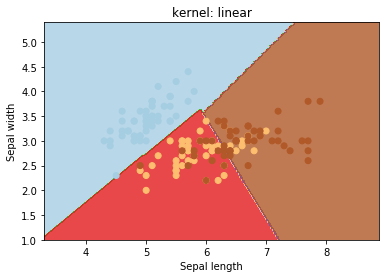

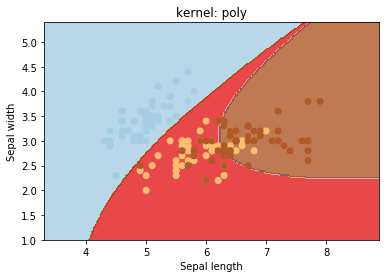

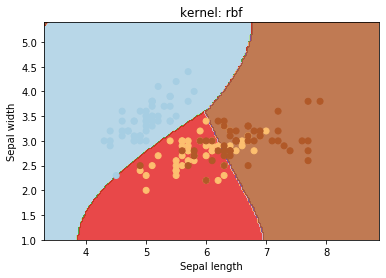

In [58]:
kernels = ['linear', 'poly', 'rbf']

for i in kernels:
    svc = SVC(kernel=i).fit(X, y)
    plotSVC('kernel: '+ (i))

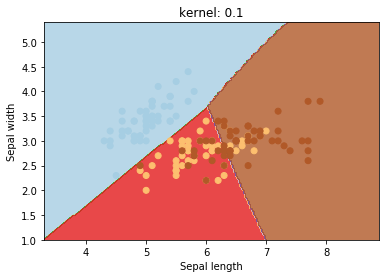

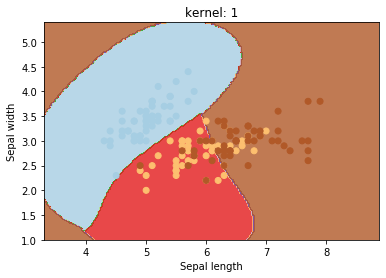

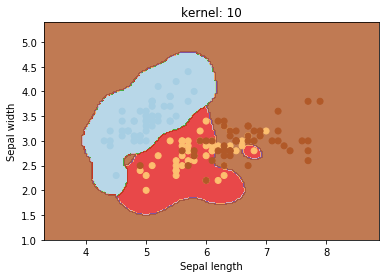

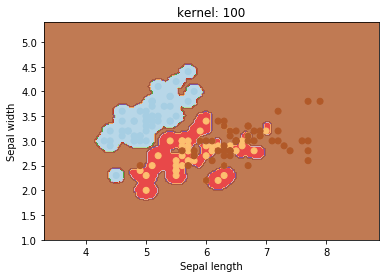

In [62]:
gammas = [0.1, 1, 10, 100]

for i in gammas:
    svc = SVC(kernel='rbf', gamma=i).fit(X, Y)
    plotSVC('kernel: '+ str(i) )